In [16]:
#importing required packages
import tensorflow
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [4]:
# Rescale the input image using ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [7]:
# preprocess all training images

train_generator = train_data_gen.flow_from_directory(
    'data/train',
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

#preprocessing test images
validation_generator = validation_data_gen.flow_from_directory(
    'data/test',
    target_size=(48,48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
#model creation

model1 = Sequential()

model1.add(Conv2D(32, (3,3), activation= 'relu', input_shape=(48,48,1)))
model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(128, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(7, activation='softmax'))

In [10]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [14]:
cv2.ocl.setUseOpenCL(False)
model1.compile(
    loss = 'categorical_crossentropy',
    optimizer=Adam(lr =0.0001, decay = 1e-4),
    metrics= ['accuracy']
)

In [17]:
early_stopping_callbacks = tensorflow.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True, verbose=1)

In [15]:
history = model1.fit(
    train_generator,
    steps_per_epoch=28709//64,
    epochs=50,
    validation_data=validation_generator,
    validation_steps= 7178// 64
)

Epoch 1/50
448/448 [==============================] - 16s 21ms/step - loss: 1.8042 - accuracy: 0.2590 - val_loss: 1.7195 - val_accuracy: 0.3463
Epoch 2/50
448/448 [==============================] - 9s 19ms/step - loss: 1.6383 - accuracy: 0.3601 - val_loss: 1.5558 - val_accuracy: 0.4118
Epoch 3/50
448/448 [==============================] - 9s 19ms/step - loss: 1.5470 - accuracy: 0.4061 - val_loss: 1.4840 - val_accuracy: 0.4382
Epoch 4/50
448/448 [==============================] - 9s 20ms/step - loss: 1.4825 - accuracy: 0.4329 - val_loss: 1.4326 - val_accuracy: 0.4579
Epoch 5/50
448/448 [==============================] - 9s 19ms/step - loss: 1.4332 - accuracy: 0.4574 - val_loss: 1.3846 - val_accuracy: 0.4746
Epoch 6/50
448/448 [==============================] - 9s 19ms/step - loss: 1.3914 - accuracy: 0.4709 - val_loss: 1.3590 - val_accuracy: 0.4798
Epoch 7/50
448/448 [==============================] - 9s 20ms/step - loss: 1.3553 - accuracy: 0.4848 - val_loss: 1.3194 - val_accuracy: 0.498

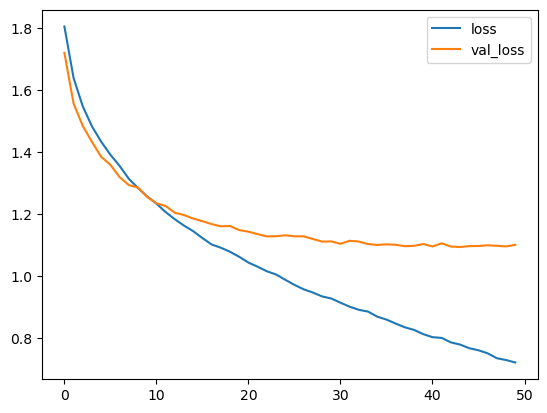

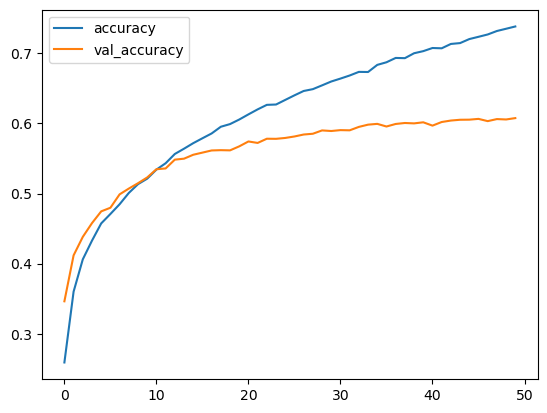

In [18]:
# Plot learning curves
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

## Saving the model

In [24]:
model_json = model1.to_json()
with open('data/model.json', 'w') as json_file:
    json_file.write(model_json)

model1.save_weights('data/model_weights.h5')